<a href="https://colab.research.google.com/github/MaiQuangDuc/Bai-Giua-Ki/blob/main/Khu%C3%B4n_m%E1%BA%B7t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/AI/Khuôn Mặt

/content/gdrive/MyDrive/AI/Khuôn Mặt


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/AI/Khuôn Mặt/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 26 images belonging to 3 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/gdrive/MyDrive/AI/Khuôn Mặt/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 26 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'Hơn': 0, 'Linh': 1, 'Đức': 2}

In [ ]:
validation.class_indices

{'Hơn': 0, 'Linh': 1, 'Đức': 2}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 27.0083 - accuracy: 0.4231 - val_loss: 2.6045 - val_accuracy: 0.3462
Epoch 2/50
1/1 [==============================] - 7s 7s/step - loss: 2.8240 - accuracy: 0.3846 - val_loss: 1.1851 - val_accuracy: 0.2308
Epoch 3/50
1/1 [==============================] - 6s 6s/step - loss: 1.1923 - accuracy: 0.2692 - val_loss: 1.3184 - val_accuracy: 0.4231
Epoch 4/50
1/1 [==============================] - 9s 9s/step - loss: 1.3218 - accuracy: 0.4231 - val_loss: 1.1774 - val_accuracy: 0.3462
Epoch 5/50
1/1 [==============================] - 8s 8s/step - loss: 1.2342 - accuracy: 0.3462 - val_loss: 1.0872 - val_accuracy: 0.3462
Epoch 6/50
1/1 [==============================] - 8s 8s/step - loss: 1.0735 - accuracy: 0.3846 - val_loss: 1.0544 - val_accuracy: 0.6923
Epoch 7/50
1/1 [==============================] - 7s 7s/step - loss: 1.0504 - accuracy: 0.5000 - val_loss: 1.0402 - val_accuracy: 0.5000
Epoch 8/50
1/1 [======================

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.025354772806167603
Train Accuracy 1.0


In [ ]:
model.save("Khuon mat.h5")

In [ ]:
model_CNN=load_model('Khuon mat.h5')

1/1 [==============================] - 0s 179ms/step
Đức


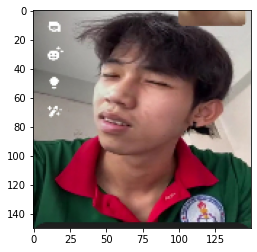

1/1 [==============================] - 0s 62ms/step
Hơn


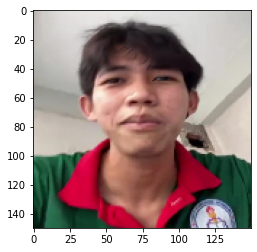

1/1 [==============================] - 0s 60ms/step
Hơn


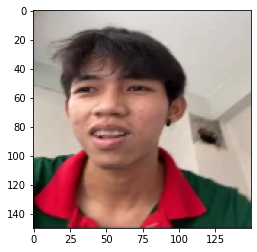

1/1 [==============================] - 0s 58ms/step
Linh


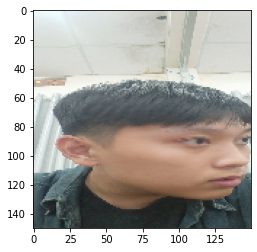

1/1 [==============================] - 0s 76ms/step
Hơn


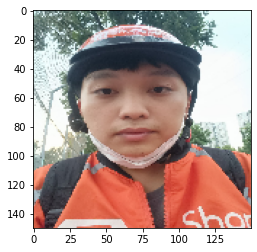

1/1 [==============================] - 0s 61ms/step
Linh


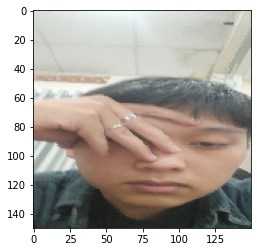

1/1 [==============================] - 0s 64ms/step
Hơn


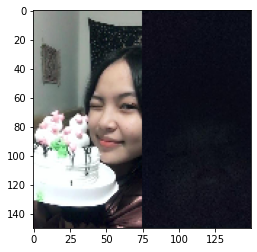

1/1 [==============================] - 0s 60ms/step
Linh


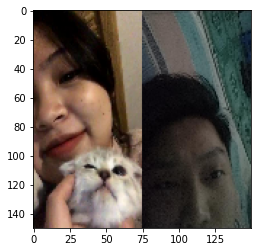

1/1 [==============================] - 0s 59ms/step
Linh


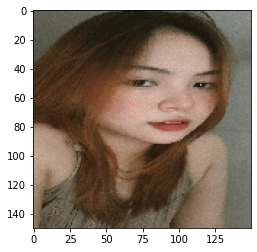

In [ ]:
test="/content/gdrive/MyDrive/AI/Khuôn Mặt/Test/"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Hơn'
  if round(result[0][1])==1:
    prediction='Linh'
  if round(result[0][2])==1:
    prediction='Đức'
  print(prediction)
  plt.show()